# Week #3 Homework: Fraud Detection
---

### Laura A. Dahlberg   2019-09-14

In this assignment, we'll train a model with pandas, seaborn and scikit-learn to create a fraud detection classifier.

Instructions:

Build a logistic regression model using Scikit-learn to predict fraudulent transactions by training it on this kaggle dataset. Before you train the model, create at least 1 visualization of the data using the seaborn library of your choice.

---

The FIRST thing before starting, is to understand the problem and what you want the model to do

pre-machine learning:

1. get data
1. read data
1. normalize the data
    1. try the sklearn preprocessing module (min_max_scaler)

1. explore/visualize data

machine learning:
1. (optional) create features 
1. use regularization to correct/prevent overfitting
1. split the data train vs. test
    1. try different percentages splits
    1. using sklearn.model_selection.train_test_split

Build a model(s) appropriate for the problem: try a couple different models
1. Logistic Regression (used mostly for classification)
1. Random Forest Classification


In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random
from pathlib import Path

import seaborn as sns
import os

### Setting up project

In [2]:
## creating relative paths
PROJ = Path().cwd()

DATA = PROJ/'data'
## creating a "data" folder, if it doesn't exist
DATA.mkdir(exist_ok=True)

### Reading the data


In [3]:
# df = pd.read_csv(DATA/'creditcard.csv') ## this is the whole file
df = pd.read_csv(DATA/'creditcard_sample.csv') ## this is the sample file for github

df = df.sample(frac=1).reset_index(drop=True)
display(df.head())
df.info()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,30048.0,-0.472038,0.296505,1.637535,0.394587,-0.878635,1.062017,-0.785093,0.953230,0.924704,...,-0.069709,0.057555,-0.052266,-0.454140,-0.314293,0.316739,-0.039378,-0.034203,22.98,0
1,135776.0,1.974817,-0.504077,-0.521839,0.160801,-0.266749,0.493407,-0.807450,0.214887,0.963512,...,0.188833,0.718387,0.132076,0.288610,-0.234283,0.546763,-0.023063,-0.053826,11.50,0
2,147848.0,1.839223,-0.747924,0.022670,0.219179,-0.751046,0.647023,-1.140823,0.322167,1.431155,...,0.302914,0.933043,0.126366,0.376760,-0.323793,-0.308130,0.057832,-0.019472,58.70,0
3,62011.0,-0.346484,0.994210,1.289982,-0.092049,0.794001,0.369367,0.599866,0.048422,-1.056777,...,-0.192821,-0.556364,-0.263634,-0.996888,-0.066622,0.236123,0.070509,0.087570,1.98,0
4,168173.0,0.117493,1.019572,-0.522039,-0.756376,1.240656,-0.201109,0.909493,0.039980,-0.403188,...,-0.297799,-0.701470,0.040039,0.138364,-0.390632,0.119619,0.225697,0.071782,4.99,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

### Exploring the data

In [4]:
# Counting number of frauds vs. non-frauds
fraud = df.loc[df['Class'] ==1]
non_frauds = df.loc[df['Class'] == 0]
print(len(fraud))
print(len(non_frauds))

492
284315


In [5]:
## This was done one time to not have to upload the whole file to github
## making a sample file for github
# sample = pd.concat([fraud, non_frauds.sample(20000)], axis=0)
#sample.info()

## saving dataframe as a csv file in the DATA directory
# sample.to_csv(DATA/'creditcard_sample.csv', index=False)

In [6]:
# viewing some basic statistical details
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.230354e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.489944e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.423891e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.103233e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,1.004144e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.476316e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.780643e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,7.155617e-17,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.419195e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


### Preprocessing the data:
looking at the values AFTER min max scaler applied

In [7]:
# rescaling the data using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
rescaled = scaler.fit_transform(df)
pd.DataFrame(rescaled, columns=[df.columns]).describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,0.548717,0.274828,0.0,0.313681,0.490138,0.806290,1.0
V1,284807.0,0.958294,0.033276,0.0,0.942658,0.958601,0.980645,1.0
V2,284807.0,0.767258,0.017424,0.0,0.760943,0.767949,0.775739,1.0
V3,284807.0,0.837414,0.026275,0.0,0.821985,0.840530,0.855213,1.0
V4,284807.0,0.251930,0.062764,0.0,0.214311,0.251050,0.284882,1.0
V5,284807.0,0.765716,0.009292,0.0,0.761060,0.765351,0.769836,1.0
V6,284807.0,0.263020,0.013395,0.0,0.255295,0.260263,0.267027,1.0
V7,284807.0,0.265356,0.007537,0.0,0.261980,0.265600,0.268831,1.0
V8,284807.0,0.785385,0.012812,0.0,0.783148,0.785625,0.788897,1.0
V9,284807.0,0.462780,0.037846,0.0,0.440626,0.461008,0.483350,1.0


## Visualizing the data:
1. First just the "Amount" to get some insights
1. Then, "Amount" by "Class"

### Amount

Text(0, 0.5, 'Density')

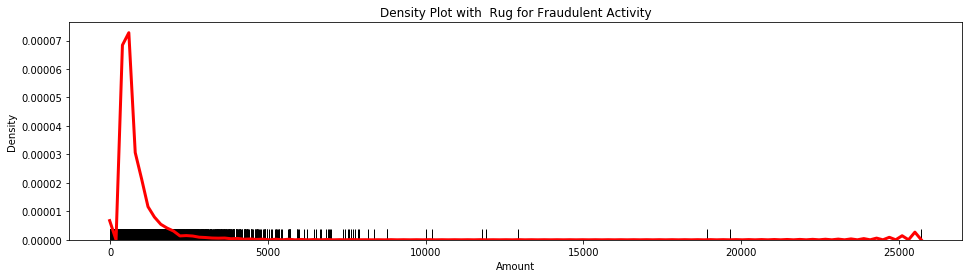

In [8]:
## Density plot with Rug
plt.figure(figsize=(16,4))
#plt.axis([-200,5000,0,0.002])
sns.distplot(df['Amount'], hist=False, kde=True, rug=True,
            color='red',
            kde_kws={'linewidth':3},
            rug_kws={'color':'black'})
# plot formating
plt.title('Density Plot with  Rug for Fraudulent Activity')
plt.ylabel('Density')

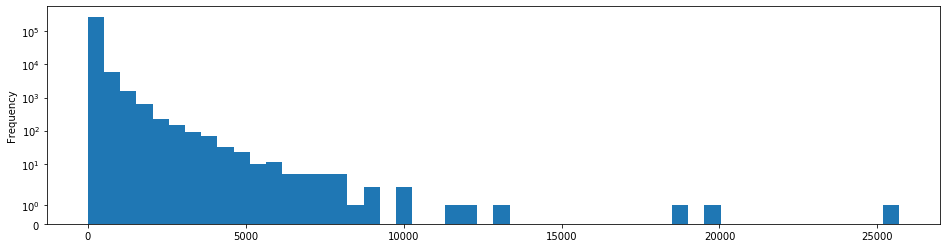

In [9]:
plt.figure(figsize=(16,4))
df.Amount.plot(kind='hist', bins=50)
plt.yscale('symlog')

### Amount by class
- the first chart shows a high-level view of the credit card activity considered "fraud"(in orange) in comparison with "non-fraud" activity (in blue). We can observe that the concetration of most fraudulent activity is below 5,000 dollars. 
- In the second chart, we zoomed in to focus on the area where we see most of the fraudulent activity. Here we can see that the  most dense area is between zero and just under 400 dollar, and then it is closely scattered until about 800 dollars and continues more scattered until about 2,200 dollars.

[-100, 2500, -0.1, 1.2]

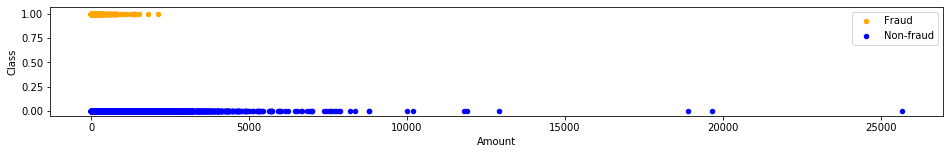

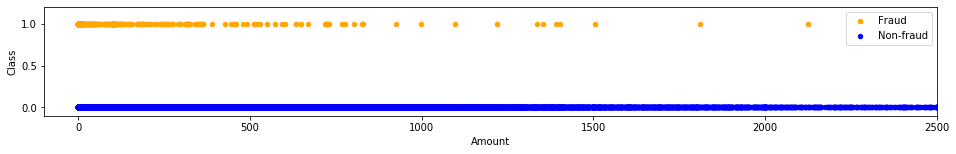

In [10]:
## plot of two variables in one chart
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud',figsize=(16, 2))
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Non-fraud', ax=ax)

## zooming in 
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud',figsize=(16, 2))
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Non-fraud', ax=ax)
plt.axis([-100,2500,-0.1,1.2])


(0, 25000)

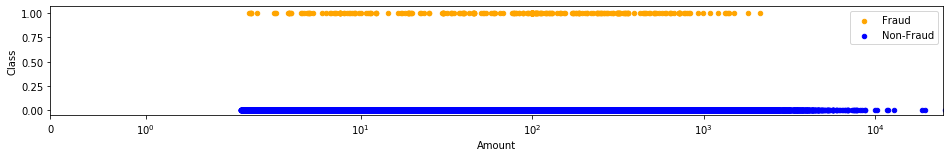

In [11]:
## this graph gives a closer look to the area where there has been fraud
ax = fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud', figsize=(16, 2))
non_frauds.plot.scatter(x='Amount', y='Class', color='Blue', label='Non-Fraud', ax=ax)
plt.xscale('symlog')
plt.xlim(0,25000)

##  Visualizing with a density graph to see better the small distribution
- In the first graph, we quickly notice the peak at the very begining, the smaller dollar amount.
- when zoomed in, we notice that the majority of fraudulent activity is under 150 dollars, and the majority of non-fraud are between 250 and 1,000.
- there is an overlap of fraud and normal activity between 250 -1,250.

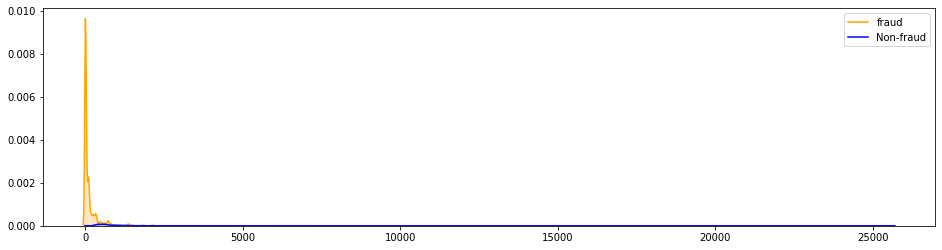

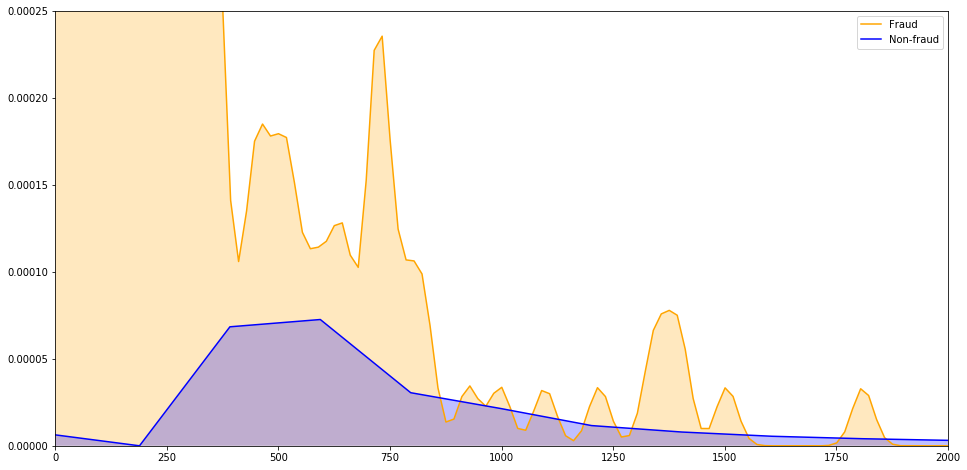

In [12]:
## density graph
plt.figure(figsize=(16, 4))
#plt.axis([0,400,0,0.010])
#plt.xlim(0,400),
#plt.ylim(0,0.01)
p1=sns.kdeplot(df[df['Class'] == 1]['Amount'], shade=True, color="orange", label='fraud')
p1=sns.kdeplot(df[df['Class'] == 0]['Amount'], shade=True, color="b", label='Non-fraud')

## zooming in
plt.figure(figsize=(16, 8))
plt.axis([0,2000,0,0.00025])
#plt.ylim(0,0.000025)
p1=sns.kdeplot(df[df['Class'] == 1]['Amount'], shade=True, color="orange", label='Fraud')
p1=sns.kdeplot(df[df['Class'] == 0]['Amount'], shade=True, color="b", label='Non-fraud')

### Pair plot to inspect feature interactions
- this lets us see inside the data
- looking for relationships and seeing how the interact with each other

In [13]:
 # sns.pairplot(df[['V26', 'V28', 'Amount','Class']],kind='scatter',hue='Class')

In [14]:
# sns.pairplot(df[['V1', 'V2', 'Amount','Class']],kind='scatter',hue='Class')

## Machine learning:


### Split the data between train and test, X (features) and y (labels)

In [15]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
random_state = 42

In [16]:
## Defining which ones are feature columns: all columns 
## except the last one, which will be the labeled data
feature_cols = df.columns.tolist()[:-1]
print(feature_cols)

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']


In [17]:
## Our "X" is the input data (feature columns)
X = df[feature_cols]

## Our 'y' (what we're trying to predict) is everything labeled "Class"
y = df['Class'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [18]:
## just checking what's inside each train and test variable 
# print(len(X_train))
# print(len(y_train))
# print(len(X_test))
# print(len(y_test))
# 99683/(185124+99683)

### Logistic Regression model
---

In [19]:
## using C to prevent overfitting
logistic = linear_model.LogisticRegression(C=1e5,random_state=random_state)
logistic.fit(X_train,y_train)

## Score is for finding a accuracy for logistic regression
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logistic.score(X_test, y_test)))

C:\Users\laura\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of logistic regression classifier on test set: 0.9987


The score is pretty high. Nevertheless, this data set has an imbalanced classification problem, way more "frauds" than "non-frauds", so accuracy is not best for this type of dataset.

So, next, let's apply classification report for this model.

In [20]:
## sanity check: checking how it's working
#logistic.classes_
#logistic.coef_ # these are the features (columns) except for the label column ('Class')

In [21]:
## CLASSIFICATION REPORT

from sklearn.metrics import classification_report
## Getting the model's prediction for y (sometimes called "y" hat)
y_pred = logistic.predict(X_test)

## this compares the test vs. the prediction
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113717
           1       0.72      0.48      0.57       206

    accuracy                           1.00    113923
   macro avg       0.86      0.74      0.79    113923
weighted avg       1.00      1.00      1.00    113923



__*READING THE CLASSIFICATION REPORT:*__ Of the entire test set, 84% of the time, the model predicted correctly that the transactions were fraudulent

#### Calculating the ROC AUC

In [22]:
## calculating roc auc
from sklearn.metrics import roc_auc_score
logistic_roc = roc_auc_score(y_test, logistic.predict(X_test))
logistic_roc


0.737692599350918

The ROC AUC (area under the curve) for the logistic regression model is 0.93

#### Plotting the ROC Curves

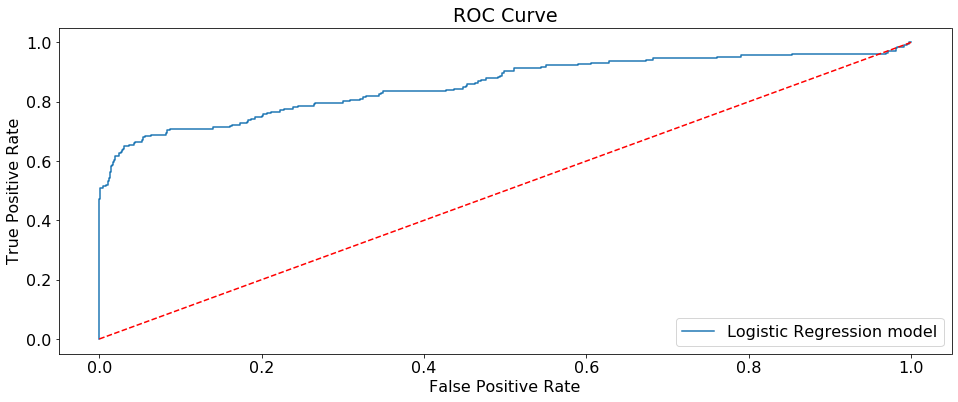

In [23]:
# plotting the ROC 
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,6))
plt.rcParams['font.size'] = 16
plt.plot(fpr, tpr, label='Logistic Regression model' % logistic_roc)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

### Random Forest Classifier model
---

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
random_f = RandomForestClassifier(n_estimators=20, max_depth=3,
                                 random_state=random_state)
random_f.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [26]:
## defining and reviewing feature importances
## this is the average importance for each feature
importances = random_f.feature_importances_
importances

array([1.66196134e-03, 2.36286253e-03, 2.07412862e-02, 2.59650530e-02,
       2.98533591e-02, 4.50101837e-04, 2.41022487e-03, 2.73827639e-02,
       6.74381851e-03, 2.47204393e-02, 1.04421328e-01, 1.70579472e-02,
       1.39323359e-01, 0.00000000e+00, 2.14023650e-01, 9.29177062e-04,
       5.75571901e-02, 2.76841299e-01, 7.18459340e-03, 1.30343167e-03,
       1.21937410e-02, 5.60597859e-03, 1.20041434e-04, 0.00000000e+00,
       1.62169244e-03, 0.00000000e+00, 4.89228140e-03, 3.56985474e-03,
       2.35709469e-03, 8.70546980e-03])

In [27]:
# check the number of estimators in forest
len(random_f.estimators_)

20

In [28]:
## ranking feature importances from most important to less important

indices = np.argsort(importances)[::-1]
print('feature ranking: ')
for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

## Same result than above, but if we want it as a dataframe
# fi = pd.DataFrame([feature_cols, random_f.feature_importances_]).T
# fi.rename(columns={0:'feat',1:'imp'}, inplace=True)
# fi.sort_values('imp', ascending=False)    

feature ranking: 
1. feature 17 (0.276841)
2. feature 14 (0.214024)
3. feature 12 (0.139323)
4. feature 10 (0.104421)
5. feature 16 (0.057557)
6. feature 4 (0.029853)
7. feature 7 (0.027383)
8. feature 3 (0.025965)
9. feature 9 (0.024720)
10. feature 2 (0.020741)
11. feature 11 (0.017058)
12. feature 20 (0.012194)
13. feature 29 (0.008705)
14. feature 18 (0.007185)
15. feature 8 (0.006744)
16. feature 21 (0.005606)
17. feature 26 (0.004892)
18. feature 27 (0.003570)
19. feature 6 (0.002410)
20. feature 1 (0.002363)
21. feature 28 (0.002357)
22. feature 0 (0.001662)
23. feature 24 (0.001622)
24. feature 19 (0.001303)
25. feature 15 (0.000929)
26. feature 5 (0.000450)
27. feature 22 (0.000120)
28. feature 13 (0.000000)
29. feature 23 (0.000000)
30. feature 25 (0.000000)


In [29]:
## prediction of actual class
y_pred = random_f.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
## probabilities for each class
probabilities = random_f.predict_proba(X_test)[:, 1]
probabilities

array([0.00045099, 0.00045099, 0.00045099, ..., 0.00045099, 0.00045099,
       0.00045099])

#### Calculating the ROC AUC

In [31]:
## calculate roc auc
roc_value = roc_auc_score(y_test, probabilities)
roc_value

0.9244942371417513

The ROC AUC (area under the curve) for the random forest is 0.93

#### Plotting the ROC Curves

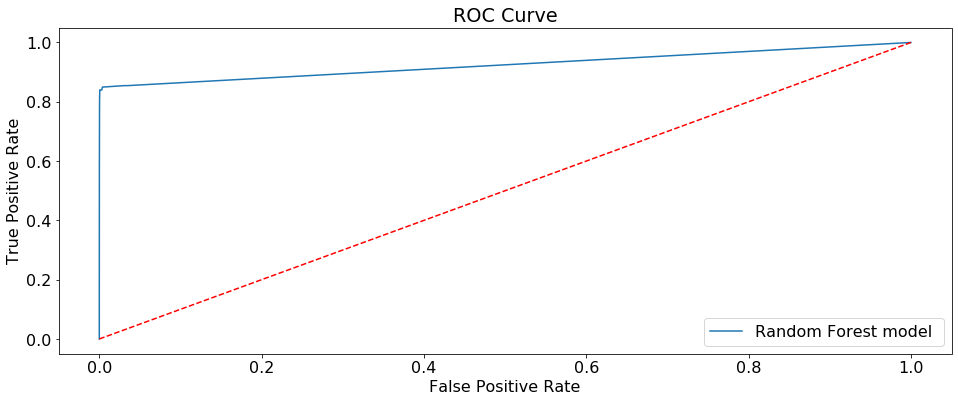

In [32]:

fpr, tpr, thresholds = roc_curve(y_test, random_f.predict_proba(X_test)[:,1])
plt.figure(figsize=(16,6))
plt.rcParams['font.size'] = 16
plt.plot(fpr, tpr, label='Random Forest model ' % roc_value)
plt.plot([0,1], [0,1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
##saves graph as a png file
#plt.savefig('Random_ROC')

For Furter exploration:
With more time, I would have liked to explore the following:
- More preprocessing
- combining features to make new ones
- try other model parameters
- Trying other models and combining them
- setup a streamlined process